# EqualWidthDiscretiser

The EqualWidthDiscretiser() divides continuous numerical variables into
intervals of the same width, that is, equidistant intervals. Note that the
proportion of observations per interval may vary.

The number of intervals
in which the variable should be divided must be indicated by the user.

**Note**

For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualWidthDiscretiser

plt.rcParams["figure.figsize"] = [15,5]

In [26]:
# data = pd.read_csv('../data/housing.csv')
# data.head()

# # let's separate into training and testing set
# X = data.drop(["Id", "SalePrice"], axis=1)
# y = data.SalePrice

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print("X_train :", X_train.shape)
# print("X_test :", X_test.shape)

In [27]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


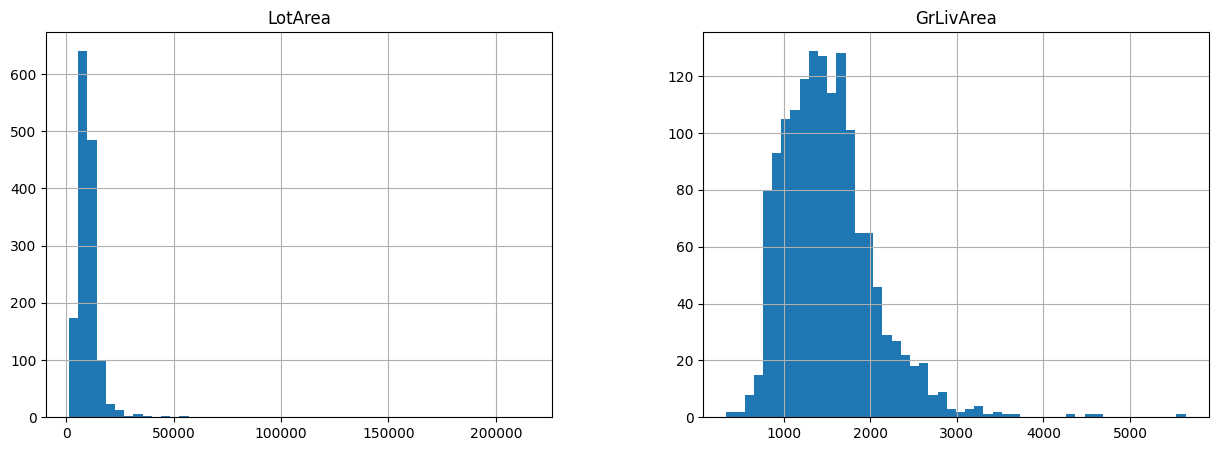

In [28]:
# we will discretise two continuous variables

X_train[["LotArea", 'GrLivArea']].hist(bins=50)
plt.show()

The EqualWidthDiscretiser() works only with numerical variables.
A list of variables can be passed as argument. Alternatively, the discretiser
will automatically select all numerical variables.

The EqualWidthDiscretiser() first finds the boundaries for the intervals for
each variable, fit.

Then, it transforms the variables, that is, sorts the values into the intervals,
transform.

In [29]:
'''
Parameters
----------

bins : int, default=10
    Desired number of equal width intervals / bins.

variables : list
    The list of numerical variables to transform. If None, the
    discretiser will automatically select all numerical type variables.

return_object : bool, default=False
    Whether the numbers in the discrete variable should be returned as
    numeric or as object. The decision should be made by the user based on
    whether they would like to proceed the engineering of the variable as
    if it was numerical or categorical.

return_boundaries: bool, default=False
    whether the output should be the interval boundaries. If True, it returns
    the interval boundaries. If False, it returns integers.
'''

ewd = EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

ewd.fit(X_train)

EqualWidthDiscretiser(variables=['LotArea', 'GrLivArea'])

In [30]:
# binner_dict contains the boundaries of the different bins
ewd.binner_dict_

{'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf],
 'GrLivArea': [-inf,
  864.8,
  1395.6,
  1926.3999999999999,
  2457.2,
  2988.0,
  3518.7999999999997,
  4049.5999999999995,
  4580.4,
  5111.2,
  inf]}

In [31]:
train_t = ewd.transform(X_train)
test_t = ewd.transform(X_test)

In [32]:
# the below are the bins into which the observations were sorted
train_t['GrLivArea'].unique()

array([2, 1, 3, 0, 4, 5, 6, 8, 7, 9])

In [33]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([X_train[["LotArea", 'GrLivArea']],
                 train_t[["LotArea", 'GrLivArea']]], axis=1)

tmp.columns = ["LotArea", 'GrLivArea', "LotArea_binned", 'GrLivArea_binned']

tmp.head()

,LotArea,GrLivArea,LotArea_binned,GrLivArea_binned
0,8450,1710,0,2
1,9600,1262,0,1
2,11250,1786,0,2
3,9550,1717,0,2
4,14260,2198,0,3


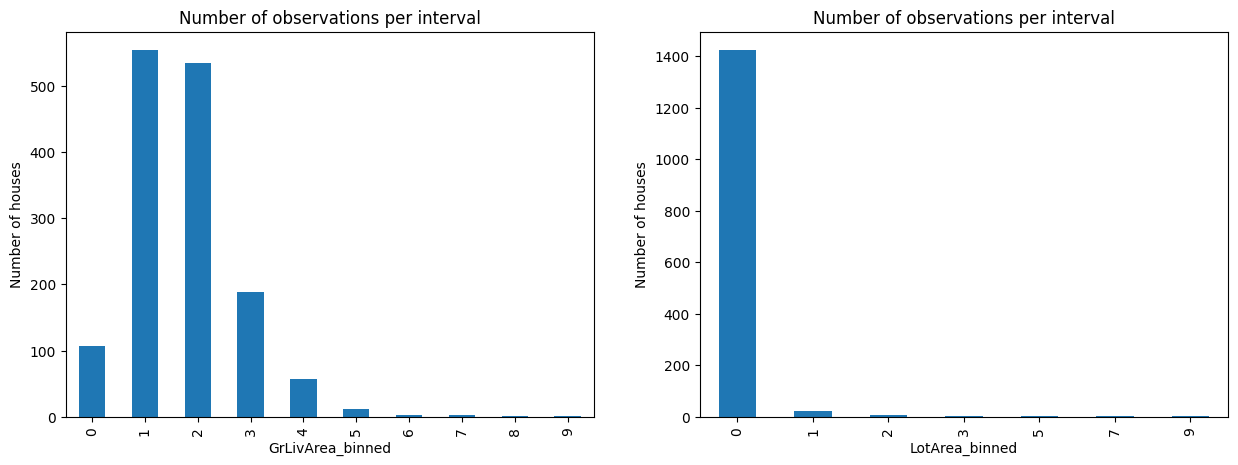

In [34]:
# Note that the bins are not equally distributed
plt.subplot(1, 2, 1)
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.title('Number of observations per interval')

plt.subplot(1, 2, 2)
tmp.groupby('LotArea_binned')['LotArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.title('Number of observations per interval')

plt.show()

### Now return interval boundaries instead

In [35]:
ewd = EqualWidthDiscretiser(
    bins=10, variables=['LotArea', 'GrLivArea'], return_boundaries=True)

ewd.fit(X_train)

EqualWidthDiscretiser(return_boundaries=True,
                      variables=['LotArea', 'GrLivArea'])

In [36]:
train_t = ewd.transform(X_train)
test_t = ewd.transform(X_test)

In [37]:
# the numbers are the different bins into which the observations
# were sorted
np.sort(np.ravel(train_t['GrLivArea'].unique()))

array(['(-inf, 864.8]', '(1395.6, 1926.4]', '(1926.4, 2457.2]',
       '(2457.2, 2988.0]', '(2988.0, 3518.8]', '(3518.8, 4049.6]',
       '(4049.6, 4580.4]', '(4580.4, 5111.2]', '(5111.2, inf]',
       '(864.8, 1395.6]'], dtype=object)

In [38]:
np.sort(np.ravel(test_t['GrLivArea'].unique()))

array(['(-inf, 864.8]', '(1395.6, 1926.4]', '(1926.4, 2457.2]',
       '(2457.2, 2988.0]', '(2988.0, 3518.8]', '(3518.8, 4049.6]',
       '(4580.4, 5111.2]', '(864.8, 1395.6]'], dtype=object)

In [39]:
#the intervals are more or less of the same length
val = np.sort(np.ravel(train_t['GrLivArea'].unique()))
val

array(['(-inf, 864.8]', '(1395.6, 1926.4]', '(1926.4, 2457.2]',
       '(2457.2, 2988.0]', '(2988.0, 3518.8]', '(3518.8, 4049.6]',
       '(4049.6, 4580.4]', '(4580.4, 5111.2]', '(5111.2, inf]',
       '(864.8, 1395.6]'], dtype=object)

In [40]:
import re

# Extract the upper bounds (except for the last interval which has 'inf')
def extract_upper_bound(interval_str):
    # Extract the number before ']'
    match = re.search(r'([0-9.]+)\]$', interval_str)
    if match:
        return float(match.group(1))
    return None

upper_bounds = [extract_upper_bound(x) for x in val if extract_upper_bound(x) is not None]
upper_bounds.sort()

differences = np.diff(upper_bounds)
print(differences)

[530.8 530.8 530.8 530.8 530.8 530.8 530.8 530.8]


In [41]:
def extract_bounds(interval_str):
    # Extract numbers from the interval string
    numbers = re.findall(r'[-+]?\d*\.\d+|\d+', interval_str)
    if len(numbers) == 2:
        return float(numbers[0]), float(numbers[1])
    return None

# Get the bounds and sort by upper bound
bounds = [extract_bounds(x) for x in val if extract_bounds(x) is not None]
bounds.sort(key=lambda x: x[1])  # sort by upper bound

# Calculate interval sizes
interval_sizes = [bounds[i][1] - bounds[i][0] for i in range(len(bounds))]
print(interval_sizes)

[530.8, 530.8000000000002, 530.7999999999997, 530.8000000000002, 530.8000000000002, 530.7999999999997, 530.7999999999997, 530.8000000000002]
